In [21]:
import numpy as np
import matplotlib.pyplot as plt
import dipy.reconst.dki as dki
import dipy.reconst.dti as dti
from dipy.reconst import mapmri
from dipy.core.gradients import gradient_table
from dipy.data import get_fnames, get_sphere
from dipy.io.gradients import read_bvals_bvecs
from dipy.io.image import load_nifti,save_nifti
from dipy.segment.mask import median_otsu
from scipy.ndimage.filters import gaussian_filter
from dipy.viz import window, actor
from mpl_toolkits.axes_grid1 import make_axes_locatable


/tmp/ipykernel_140393/673494220.py:11: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [2]:
fraw, fbval, fbvec, t1_fname = get_fnames('cfin_multib')
data, affine = load_nifti(fraw)
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)
gtab_dki = gradient_table(bvals, bvecs)


In [3]:
maskdata, mask = median_otsu(data, vol_idx=[0, 1], median_radius=4, numpass=2,
                             autocrop=False, dilate=1)

In [4]:
fwhm = 1.25
gauss_std = fwhm / np.sqrt(8 * np.log(2))  # converting fwhm to Gaussian std
data_smooth = np.zeros(data.shape)
for v in range(data.shape[-1]):
    data_smooth[..., v] = gaussian_filter(data[..., v], sigma=gauss_std)

In [5]:
dkimodel = dki.DiffusionKurtosisModel(gtab_dki)

In [6]:
dkifit = dkimodel.fit(data_smooth, mask=mask)

In [7]:
FA = dkifit.fa
MD = dkifit.md
AD = dkifit.ad
RD = dkifit.rd

In [8]:
tenmodel = dti.TensorModel(gtab_dki)
tenfit = tenmodel.fit(data_smooth, mask=mask)

dti_FA = tenfit.fa
dti_MD = tenfit.md
dti_AD = tenfit.ad
dti_RD = tenfit.rd

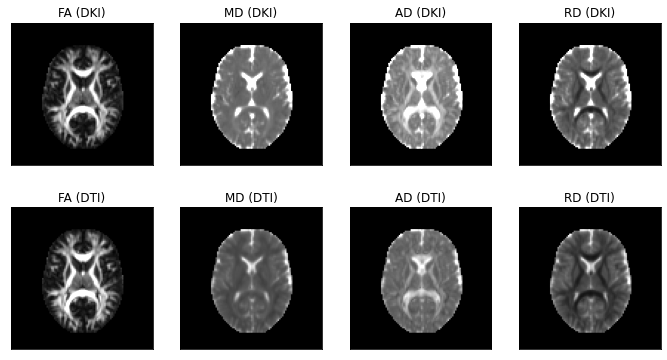

In [9]:
axial_slice = 9

fig1, ax = plt.subplots(2, 4, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig1.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(FA[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=0.7, origin='lower')
ax.flat[0].set_title('FA (DKI)')
ax.flat[1].imshow(MD[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=2.0e-3, origin='lower')
ax.flat[1].set_title('MD (DKI)')
ax.flat[2].imshow(AD[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=2.0e-3, origin='lower')
ax.flat[2].set_title('AD (DKI)')
ax.flat[3].imshow(RD[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=2.0e-3, origin='lower')
ax.flat[3].set_title('RD (DKI)')

ax.flat[4].imshow(dti_FA[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=0.7, origin='lower')
ax.flat[4].set_title('FA (DTI)')
ax.flat[5].imshow(dti_MD[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=2.0e-3, origin='lower')
ax.flat[5].set_title('MD (DTI)')
ax.flat[6].imshow(dti_AD[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=2.0e-3, origin='lower')
ax.flat[6].set_title('AD (DTI)')
ax.flat[7].imshow(dti_RD[:, :, axial_slice].T, cmap='gray',
                  vmin=0, vmax=2.0e-3, origin='lower')
ax.flat[7].set_title('RD (DTI)')

plt.show()
# fig1.savefig('Diffusion_tensor_measures_from_DTI_and_DKI.png')

In [10]:
MK = dkifit.mk(0, 3)
AK = dkifit.ak(0, 3)
RK = dkifit.rk(0, 3)

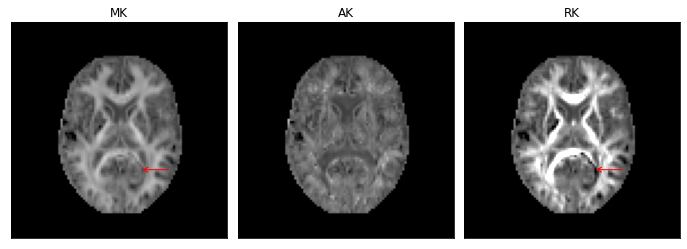

In [11]:
fig2, ax = plt.subplots(1, 3, figsize=(12, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig2.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(MK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[0].set_title('MK')
ax.flat[0].annotate('', fontsize=12, xy=(57, 30),
                    color='red',
                    xycoords='data', xytext=(30, 0),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle="->",
                                    color='red'))
ax.flat[1].imshow(AK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[1].set_title('AK')
ax.flat[2].imshow(RK[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[2].set_title('RK')
ax.flat[2].annotate('', fontsize=12, xy=(57, 30),
                    color='red',
                    xycoords='data', xytext=(30, 0),
                    textcoords='offset points',
                    arrowprops=dict(arrowstyle="->",
                                    color='red'))

plt.show()
# fig2.savefig('Kurtosis_tensor_standard_measures.png')

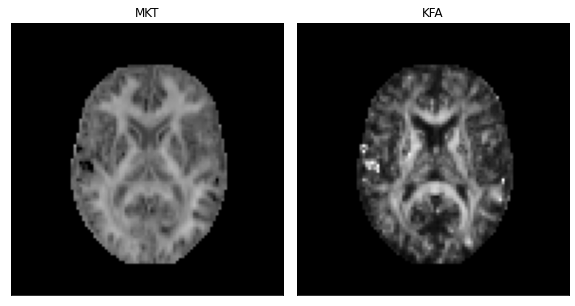

In [12]:
MKT = dkifit.mkt(0, 3)
KFA = dkifit.kfa

fig3, ax = plt.subplots(1, 2, figsize=(10, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

fig3.subplots_adjust(hspace=0.3, wspace=0.05)

ax.flat[0].imshow(MKT[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1.5,
                  origin='lower')
ax.flat[0].set_title('MKT')
ax.flat[1].imshow(KFA[:, :, axial_slice].T, cmap='gray', vmin=0, vmax=1,
                  origin='lower')
ax.flat[1].set_title('KFA')

plt.show()
fig3.savefig('Measures_from_kurtosis_tensor_only.png')

# MAP

In [13]:
big_delta = 0.0365  # seconds
small_delta = 0.0157  # seconds
gtab_map = gradient_table(bvals=gtab_dki.bvals, bvecs=gtab_dki.bvecs,
                      big_delta=big_delta,
                      small_delta=small_delta)

In [14]:
data_small = data[40:65, 50:51]

print('data.shape (%d, %d, %d, %d)' % data.shape)

data.shape (96, 96, 19, 496)


In [15]:
radial_order = 6
map_model_both_aniso = mapmri.MapmriModel(gtab_map, radial_order=radial_order,
                                          laplacian_regularization=True,
                                          laplacian_weighting=.05,
                                          positivity_constraint=True)


In [16]:
mapfit_both_aniso = map_model_both_aniso.fit(data_small)


In [17]:
rtop=mapfit_both_aniso.rtop()
rtap=mapfit_both_aniso.rtap()
rtpp=mapfit_both_aniso.rtpp()
norm_laplacian=mapfit_both_aniso.norm_of_laplacian_signal()
msd=mapfit_both_aniso.msd()
qiv=mapfit_both_aniso.qiv()


In [18]:
map_model_both_ng = mapmri.MapmriModel(gtab_map, radial_order=radial_order,
                                       laplacian_regularization=True,
                                       laplacian_weighting=.05,
                                       positivity_constraint=True,
                                       bval_threshold=2000)           

In [19]:
mapfit_both_ng = map_model_both_ng.fit(data_small)

In [20]:
ng=mapfit_both_ng.ng()
ng_perpendicular=mapfit_both_ng.ng_perpendicular()
ng_parallel=mapfit_both_ng.ng_parallel()

In [23]:
save_nifti("ng.nii.gz", ng,affine=affine)

In [25]:
os.getcwd()

'/mnt/hgfs/E/00_github/00_MR_Analysis/01_FSL/11_ukbiobank/UK_biobank_pipeline_v_1_no_tp/bb_diffusion_pipeline/bb_DKI'